In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from workalendar.america import Brazil
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create a Brazil calendar object
pd.options.display.max_rows = 10

sys.path.append(
    "/Users/skronski/Documents/Projects/e_commerce/00_programs/00_project_setup"
)
from directories import directories_path_setup
from directories import update_gitignore
from directories import reading_files

# improting transformers for pipelines

from pipelines_transformers import DateImputer, VolumeCalculator


directories = directories_path_setup(
    "e_commerce", "/Users/skronski/Documents/Projects/"
)
files_dict = reading_files(directories)

olist_sellers_dataset = files_dict["olist_sellers_dataset"]
product_category_name_translation = files_dict["product_category_name_translation"]
olist_orders_dataset = files_dict["olist_orders_dataset"]
olist_order_items_dataset = files_dict["olist_order_items_dataset"]
olist_customers_dataset = files_dict["olist_customers_dataset"]
olist_order_payments_dataset = files_dict["olist_order_payments_dataset"]
olist_order_reviews_dataset = files_dict["olist_order_reviews_dataset"]
olist_products_dataset = files_dict["olist_products_dataset"]
olist_geolocation_dataset = files_dict["olist_geolocation_dataset"]

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_2722/869608425.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The /Users/skronski/Documents/Projects/e_commerce/00_programs exists already.
The /Users/skronski/Documents/Projects/e_commerce/01_input exists already.
The /Users/skronski/Documents/Projects/e_commerce/02_output exists already.
The /Users/skronski/Documents/Projects/e_commerce/03_temporary exists already.
['/Users/skronski/Documents/Projects/e_commerce/01_input/olist_sellers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/product_category_name_translation.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_orders_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_items_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_customers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_geolocation_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_payments_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_reviews

In [2]:
reviews_orders = olist_order_reviews_dataset.merge(
    olist_orders_dataset, on="order_id", how="left"
)
reviews_orders_items = reviews_orders.merge(
    olist_order_items_dataset, on="order_id", how="left"
)
reviews_orders_items_products = reviews_orders_items.merge(
    olist_products_dataset, on="product_id", how="left"
)
reviews_orders_items_products

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,...,226.77,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,...,199.99,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,...,215.97,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,...,50.95,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0


In [3]:
df = reviews_orders_items_products[
    [
        "review_score",
        "review_answer_timestamp",
        "order_status",
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "shipping_limit_date",
        "price",
        "freight_value",
        "product_category_name",
        "product_name_lenght",
        "product_description_lenght",
        "product_photos_qty",
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm",
    ]
]
datetime_columns = ["review_answer_timestamp", "order_purchase_timestamp"]
date_columns = [
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
]
date_columns_all = [
    "order_approved_at",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

size_columns = ["product_length_cm", "product_height_cm", "product_width_cm"]
all_columns = [
    "review_answer_timestamp",
    "order_status",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
    "price",
    "freight_value",
    "product_category_name",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

In [5]:
# converting to datetime
orders = df
orders.loc[:, "order_purchase_timestamp"] = pd.to_datetime(
    orders.order_purchase_timestamp
)
orders.loc[:, "order_approved_at"] = pd.to_datetime(orders.order_approved_at).dt.date
orders.loc[:, "order_estimated_delivery_date"] = pd.to_datetime(
    orders.order_estimated_delivery_date
).dt.date
orders.loc[:, "order_delivered_customer_date"] = pd.to_datetime(
    orders.order_delivered_customer_date
).dt.date


from sklearn.model_selection import train_test_split

# split
X = orders.drop("review_score", axis=1)
y = orders["review_score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
numeric_df = X_train.select_dtypes(include=["int", "float"])

# Define numeric columns
numeric_cols = numeric_df.columns

In [6]:
pipeline = Pipeline(
    [
        ("date_imputer", DateImputer(date_columns)),
        # Add more steps to your pipeline if needed
    ]
)
pipeline_volume = Pipeline(
    [
        ("volume", VolumeCalculator()),
        # Add more ste
    ]
)
# Apply the pipeline to your dataframe
pipeline_volume.fit_transform(X_train, y_train)

,review_answer_timestamp,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_of_product,volume_weight_ratio
91095,2018-01-25 01:41:39,delivered,2018-01-04 15:14:41,2018-01-04,2018-01-05 22:55:11,2018-01-20,2018-02-08,2018-01-10 15:31:22,40.90,28.75,papelaria,47.0,231.0,1.0,900.0,46.0,10.0,33.0,15180.0,0.059289
71974,2018-04-07 03:49:46,delivered,2018-03-10 12:41:26,2018-03-10,2018-03-12 20:32:12,2018-04-04,2018-04-03,2018-03-15 12:50:28,180.00,22.34,beleza_saude,44.0,635.0,1.0,4050.0,25.0,22.0,21.0,11550.0,0.350649
110771,2018-07-02 01:08:11,delivered,2018-06-17 22:24:52,2018-06-19,2018-06-19 15:38:00,2018-06-30,2018-07-25,2018-07-04 04:16:57,25.99,10.71,bebes,49.0,888.0,1.0,200.0,33.0,6.0,12.0,2376.0,0.084175
56464,2017-11-26 23:46:55,delivered,2017-11-06 17:49:57,2017-11-08,2017-11-09 21:48:44,2017-11-24,2017-11-30,2017-11-14 03:30:27,89.90,19.87,automotivo,54.0,1209.0,4.0,2200.0,30.0,30.0,30.0,27000.0,0.081481
3277,2018-07-30 16:48:32,delivered,2018-07-19 16:50:34,2018-07-19,2018-07-24 12:42:00,2018-07-27,2018-08-20,2018-07-31 17:03:58,44.00,13.65,utilidades_domesticas,60.0,213.0,1.0,450.0,16.0,30.0,11.0,5280.0,0.085227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,2017-12-14 16:30:19,delivered,2017-12-06 14:06:15,2017-12-07,2017-12-07 17:32:48,2017-12-13,2017-12-29,2017-12-13 03:16:20,144.99,17.26,cool_stuff,57.0,629.0,1.0,750.0,42.0,25.0,15.0,15750.0,0.047619
110268,2018-01-27 22:35:41,delivered,2018-01-09 20:22:23,2018-01-11,2018-01-13 02:10:17,2018-01-26,2018-02-07,2018-01-17 02:48:36,39.99,15.10,telefonia,60.0,751.0,3.0,150.0,17.0,4.0,12.0,816.0,0.183824
103694,2018-03-28 02:02:32,delivered,2018-03-14 00:17:05,2018-03-14,2018-03-15 19:19:31,2018-03-26,2018-04-12,2018-03-21 00:29:10,35.00,16.32,moveis_decoracao,41.0,789.0,1.0,750.0,20.0,35.0,20.0,14000.0,0.053571
860,2018-08-15 21:26:52,delivered,2018-08-05 20:56:20,2018-08-05,2018-08-06 13:59:00,2018-08-14,2018-08-14,2018-08-07 21:10:18,26.40,19.38,cama_mesa_banho,32.0,501.0,1.0,550.0,35.0,2.0,50.0,3500.0,0.157143


In [12]:
# Assuming your dataframe is named df
date_columns = [
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
]

# Define columns for numerical and categorical features
numerical_columns = [
    "price",
    "freight_value",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "volume_of_product",
    "volume_weight_ratio",
]

categorical_columns = ["order_status", "product_category_name", "is_late"]

# Define the pipeline
date_imputer = Pipeline(
    [
        ("date_imputer", DateImputer(date_columns)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ]
)

pipeline = Pipeline(
    [
        ("date_imputer", date_imputer),
        ("vol", pipeline_volume),
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor()),  # Using XGBoost regressor
    ]
)

# Assuming 'review_score' is your target column
X = df.drop(columns=["review_score"])
y = df["review_score"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('date_imputer',
                 Pipeline(steps=[('date_imputer',
                                  <pipelines_transformers.DateImputer object at 0x2ad8c9eb0>)])),
                ('vol',
                 Pipeline(steps=[('volume',
                                  <pipelines_transformers.VolumeCalculator object at 0x2b8a261c0>)])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'freight_value',
                                                   'product_name_lenght',
                                                   'product_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [13]:
y_pred = pipeline.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4892085561962294


In [42]:
# get feature importances
feature_importances = pipeline.named_steps["regressor"].feature_importances_

# Get feature names from preprocessor
encoded_categorical_columns = (
    pipeline.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(input_features=categorical_columns)
)
all_feature_names = numerical_columns + list(encoded_categorical_columns)

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Display top 10 most important features
print("Top 10 most important features:")
print(pd.DataFrame(feature_importance_df))

Top 10 most important features:
                                         Feature  Importance
92                                 is_late_False    0.417435
73       product_category_name_moveis_escritorio    0.054594
13                        order_status_delivered    0.022845
31         product_category_name_cama_mesa_banho    0.016273
62  product_category_name_informatica_acessorios    0.014683
..                                           ...         ...
53         product_category_name_fashion_esporte    0.000000
76                  product_category_name_musica    0.000000
91                     product_category_name_nan    0.000000
11                         order_status_approved    0.000000
93                                  is_late_True    0.000000

[94 rows x 2 columns]


# with simple imputer

In [49]:
# Assuming your dataframe is named df
date_columns = [
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
]

# Define columns for numerical and categorical features
numerical_columns = [
    "price",
    "freight_value",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "volume_of_product",
    "volume_weight_ratio",
]

categorical_columns = ["order_status", "product_category_name", "is_late"]

# Define the pipeline
date_imputer = Pipeline(
    [
        ("date_imputer", DateImputer(date_columns)),
    ]
)
preprocessor_0 = ColumnTransformer(
    transformers=[
        (
            "num_",
            SimpleImputer(strategy="mean"),
            numerical_columns,
        ),  # Impute missing values in numerical columns with mean
        (
            "cat_",
            SimpleImputer(strategy="most_frequent"),
            categorical_columns,
        ),  # Impute missing values in categorical columns with most frequent value
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            Pipeline(
                [
                    (
                        "imputer",
                        SimpleImputer(strategy="mean"),
                    ),  # Impute missing values in numerical columns with mean
                    ("scaler", StandardScaler()),  # Scale numerical columns
                ]
            ),
            numerical_columns,
        ),
        (
            "cat",
            Pipeline(
                [
                    (
                        "imputer",
                        SimpleImputer(strategy="most_frequent"),
                    ),  # Impute missing values in categorical columns with most frequent value
                    (
                        "encoder",
                        OneHotEncoder(handle_unknown="ignore"),
                    ),  # One-hot encode categorical columns
                ]
            ),
            categorical_columns,
        ),
    ]
)

pipeline = Pipeline(
    [
        ("date_imputer", date_imputer),
        ("vol", pipeline_volume),
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor()),  # Using XGBoost regressor
    ]
)

# Assuming 'review_score' is your target column
X = df.drop(columns=["review_score"])
y = df["review_score"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('date_imputer',
                 Pipeline(steps=[('date_imputer',
                                  <__main__.DateImputer object at 0x2cce14970>)])),
                ('vol',
                 Pipeline(steps=[('volume',
                                  <__main__.VolumeCalculator object at 0x2a5baed60>)])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['price', 'freight_value',
                                                   'p...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [50]:
y_pred = pipeline.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4856424155324621


In [52]:
df.shape

(113131, 19)

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming 'review_score' is your target column
X = df.drop(columns=["review_score"])
y = df["review_score"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid for XGBoost
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [3, 4, 5],
    "regressor__learning_rate": [0.1, 0.01, 0.001],
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate on test set
test_score = grid_search.score(X_test, y_test)
print("Test score:", test_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Best score found: 0.23090734118621672
Test score: 0.22829295097168623


In [54]:
import joblib

# Save the model to disk
joblib.dump(grid_search.best_estimator_, "xgboost_model.pkl")

['xgboost_model.pkl']

In [15]:
import joblib

# Load the model from disk
xgb_model = joblib.load("xgboost_model.pkl")

# Now you can use the loaded model for predictions
predictions = xgb_model.predict(X_test)

In [56]:
y_pred = predictions
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4996900098453336


# Evaluation




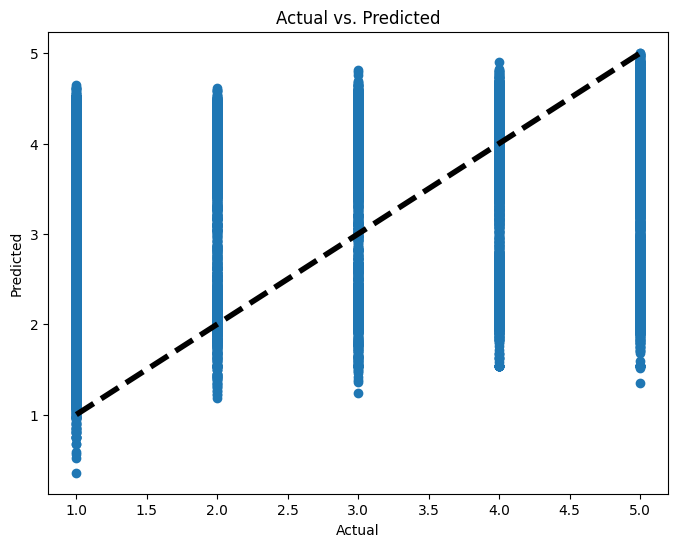

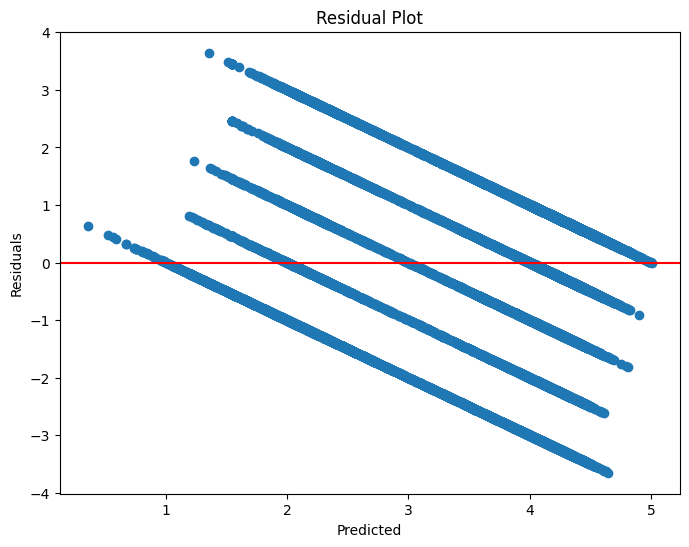

In [21]:
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "k--", lw=4)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs. Predicted")
    plt.show()


# Function to plot residuals
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.axhline(y=0, color="r", linestyle="-")
    plt.show()


# 1. Actual vs. Predicted plot
y_train_pred = xgb_model.predict(X_train)
plot_actual_vs_predicted(y_train, y_train_pred)

# 2. Residual Plot
plot_residuals(y_train, y_train_pred)

# 3. Feature Importance Plot

Top 10 most important features:


/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_1394/3958430627.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


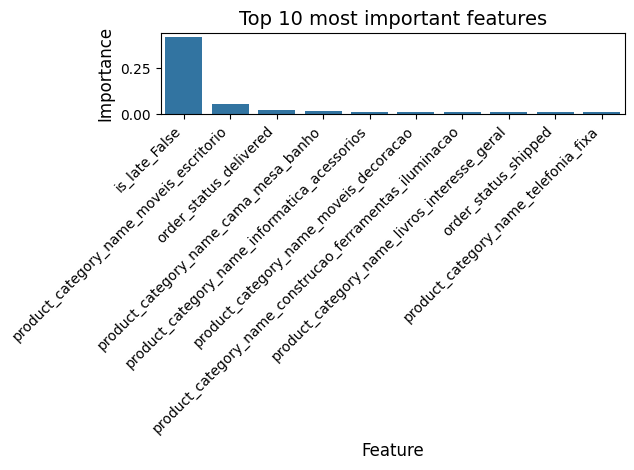

In [32]:
feature_importances = pipeline.named_steps["regressor"].feature_importances_

# Get feature names from preprocessor
encoded_categorical_columns = (
    pipeline.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(input_features=categorical_columns)
)
all_feature_names = numerical_columns + list(encoded_categorical_columns)

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Display top 10 most important features
print("Top 10 most important features:")
pd.DataFrame(feature_importance_df.head(10))
top_features = feature_importance_df.head(10)


ax = sns.barplot(x="Feature", y="Importance", data=top_features)

# Rotating the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adding labels and title
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.title("Top 10 most important features", fontsize=14)

plt.tight_layout()
plt.show()